# Assignment A1 [35 marks]



The assignment consists of 4 exercises. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **discussion** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

---
## Question 1: Numerical Linear Algebra [8 marks]

**1.1** Using the method of your choice, solve the linear system $Ax = b$ with

$$ A = \begin{pmatrix}
          1 &  1 & 0 & 1  \\ 
         -1 &  0 & 1 & 1  \\ 
          0 & -1 & 0 & -1  \\ 
          1 & 0 & 1 & 0 
        \end{pmatrix}
        \qquad \text{and} \qquad 
    b = \begin{pmatrix}
           5.2 \cr 0.1 \cr 1.9 \cr 0
        \end{pmatrix},
$$

and compute the residual norm $r = \|Ax-b\|_2$. Display the value of $r$ in a clear and easily readable manner.

**[2 marks]**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#manually import matrix A and vector b
A=np.array([[1,1,0,1],
           [-1,0,1,1],
           [0,-1,0,-1],
           [1,0,1,0]],dtype=float)
b=np.array([5.2,0.1,1.9,0],dtype=float)
#solve and print x
x=np.linalg.solve(A, b)
print(f"the solution of Ax-b=0 is x ={x}")

#compute the residual r=||Ax-b||2
r=np.sqrt(((A @ x.T - b.T) @ (A @ x.T - b.T).T)) 
print (f"the residual norm r = {r}")

the solution of Ax-b=0 is x =[  7.1 -16.2  -7.1  14.3]
the residual norm r = 3.9511502286300045e-15


**1.2** Repeat the same calculations for the matrix

$$ A = \begin{pmatrix}
          a &  1 & 0 & 1  \\ 
         -1 &  0 & 1 & 1  \\ 
          0 & -1 & 0 & -1  \\ 
          1 & 0 & 1 & 0 
        \end{pmatrix}
        \qquad \text{with} \qquad a \in \{10^{-8}, 10^{-10}, 10^{-12}\}. 
$$

Display the value of $r$ for each value of $a$, and avoid repeating (copy+pasting) code.

**[3 marks]**

In [2]:
a=10 ** (-8)
for i in range (3):
    #note that value output is labelled as the ith value
    print (f"for a={a},we have:")
    A=np.array([[a,1,0,1],
           [-1,0,1,1],
           [0,-1,0,-1],
           [1,0,1,0]],dtype=float)
    b=np.array([5.2,0.1,1.9,0],dtype=float)
    #solve and print x
    x=np.linalg.solve(A, b)
    print(f"the solution of Ax-b=0 is x{i} ={x}")
    #compute the residual r=||Ax-b||2
    r=np.sqrt(((A @ x.T - b.T) @ (A @ x.T - b.T).T)) 
    print (f"the residual norm r{i} = {r}\n")
    a=a * 10**(-2)
    

for a=1e-08,we have:
the solution of Ax-b=0 is x0 =[ 7.10000004e+08 -1.42000001e+09 -7.10000004e+08  1.42000001e+09]
the residual norm r0 = 2.5343532069515723e-07

for a=1e-10,we have:
the solution of Ax-b=0 is x1 =[ 7.09999941e+10 -1.41999988e+11 -7.09999941e+10  1.41999988e+11]
the residual norm r1 = 1.0243666985409166e-05

for a=1e-12,we have:
the solution of Ax-b=0 is x2 =[ 7.09936886e+12 -1.41987377e+13 -7.09936886e+12  1.41987377e+13]
the residual norm r2 = 0.0011615401253156903



**1.3** Summarise and explain your observations in a discussion of no more than $250$ words.

**[3 marks]**

📝 ***Discussion for question 1.3***

On the codes above, we try to change one parameter $a$ in the matrix and observe change in the solution x and its residual norm. We observe that as $a$ gets smaller by multiplication with $10^{-2}$ each element in the solution also gets smaller by multiplication with $10^{-2}$, aprroximatedly though. The order of magnitude of residual norm also gets smaller by $10^{-2}$.  


---
## Question 2: Sums [10 marks]

Consider the sum

$$
S_N = \sum_{n=1}^N \frac{2n+1}{n^2(n+1)^2}.
$$

**2.1** Write a function `sum_S()` which takes 2 input arguments, a positive integer `N` and a string `direction`, and computes the sum $S_N$ **iteratively** (i.e. using a loop):
- in the direction of increasing $n$ if `direction` is `'up'`,
- in the direction of decreasing $n$ if `direction` is `'down'`.

For instance, to calculate $S_{10}$ in the direction of decreasing $n$, you would call your function using `sum_S(10, 'down')`.

**[3 marks]**

In [3]:
def sum_S(N,direction):
    #We first set the partial sum Ps to be zero
    Ps=0
    #Let the summation starts form n=N to n=1 if down
    #Let the summation starts from n=1 to n=N if up
    if direction=="up":
        n=1
        while n<= N:
            Ps=Ps+(2*n+1)/((n**2)*((n+1)**2))
            n=n+1 
    elif direction == "down":
        n=N
        while n>=1:
             Ps+=(2*n+1)/((n**2)*((n+1)**2))
             n=n-1 
    return Ps
#Let's try to output an example with S_10
print(f"S10,up = {sum_S(10, 'up')}")
print(f"S10,down = {sum_S(10, 'down')}")

S10,up = 0.9917355371900827
S10,down = 0.9917355371900827


**2.2** The sum $S_N$ has the closed-form expression $S_N = 1-\frac{1}{(N+1)^2}$. We assume that we can compute $S_N$ using this expression without significant loss of precision, i.e. that we can use this expression to obtain a "ground truth" value for $S_N$.

Using your function `sum_S()`, compute $S_N$ iteratively in both directions, for 10 different values of $N$, linearly spaced, between $10^3$ and $10^6$ (inclusive).

For each value of $N$, compare the results in each direction with the closed-form expression. Present your results graphically, in a clear and understandable manner.

**[4 marks]**

In [4]:
x = np.linspace(10**3, 10**6, 10) #This is the linearly sapced N

#define an array to store the 10 values
up=np.empty(shape=(10),dtype=float)
down=np.empty(shape=(10),dtype=float)

#compute 𝑆𝑁 iteratively in both directions for linearly sapced N
for i in range(10):
    SN=sum_S(x[i],"up")
    up[i]=SN
    print(f"for N={x[i]},up,sum={up[i]}")
print("\n")
for i in range(10):
    SN=sum_S(x[i],"down")
    down[i]=SN
    print(f"for N={x[i]},down,sum={down[i]}")

for N=1000.0,up,sum=0.9999990019970034
for N=112000.0,up,sum=0.999999999920272
for N=223000.0,up,sum=0.999999999980058
for N=334000.0,up,sum=0.9999999999926349
for N=445000.0,up,sum=0.9999999999926349
for N=556000.0,up,sum=0.9999999999926349
for N=667000.0,up,sum=0.9999999999926349
for N=778000.0,up,sum=0.9999999999926349
for N=889000.0,up,sum=0.9999999999926349
for N=1000000.0,up,sum=0.9999999999926349


for N=1000.0,down,sum=0.999999001997004
for N=112000.0,down,sum=0.999999999920282
for N=223000.0,down,sum=0.9999999999798912
for N=334000.0,down,sum=0.999999999991036
for N=445000.0,down,sum=0.9999999999949502
for N=556000.0,down,sum=0.9999999999967653
for N=667000.0,down,sum=0.9999999999977522
for N=778000.0,down,sum=0.9999999999983479
for N=889000.0,down,sum=0.9999999999987347
for N=1000000.0,down,sum=0.999999999999


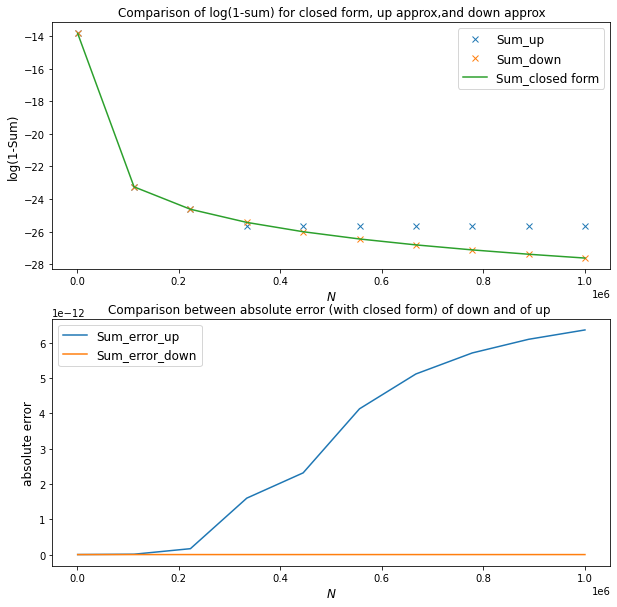

In [5]:
# Define the closed-form
def cfSum_S(N):
    s=1-(1/((N+1)**2))
    return s

#define the absolute error for up
Sum_error_up = abs(cfSum_S(x)-up)
#define the error for down
Sum_error_down = abs(cfSum_S(x)-down)


fig, ax = plt.subplots(2, 1, figsize=(10, 10))

#Note!! In ax[0], we use log(1-sum) to better show the data
ax[0].plot(x, np.log(1-up), "x", label="Sum_up")
ax[0].plot(x, np.log(1-down), "x", label="Sum_down")
ax[0].plot(x, np.log(1-cfSum_S(x)), "-", label="Sum_closed form")
ax[0].set_xlabel(r"$N$", fontsize=12)
ax[0].set_ylabel(r"log(1-Sum)", fontsize=12)
ax[0].legend(loc="upper right", fontsize=12)
ax[0].set_title("Comparison of log(1-sum) for closed form, up approx,and down approx")

ax[1].plot(x, Sum_error_up, "-", label="Sum_error_up")
ax[1].plot(x, Sum_error_down, "-", label="Sum_error_down")
#ax[1].set_xlim([x[0], x[-1]])
#ax[1].set_ylim([0, 2])
ax[1].set_xlabel(r"$N$", fontsize=12)
ax[1].set_ylabel(r"absolute error", fontsize=12)
ax[1].legend(loc="upper left", fontsize=12)
ax[1].set_title("Comparison between absolute error (with closed form) of down and of up ")

plt.show()

**2.3** Describe and explain your findings in no more that $250$ words. Which direction of summation provides the more accurate result? Why?

**[3 marks]**

📝 ***Discussion for question 2.3***

From both of the plots, we can clearly observe that the summation downwards is more accurate than summation upwards.
It is because the formular given for partial sum in this case guarantees if n gets larger the value of the general term will get smaller. It follows approximation down begins the summation by adding smaller (compare to approxiamtion up) terms, where small terms (float) have a higher precision.


---
## Question 3: Numerical Integration [10 marks]

For integer $k \neq 0$ consider the integral 

$$
I(k) = \int_0^{2\pi}  x^4 \cos{k x} \ dx = \frac{32\pi^3}{k^2} - \frac{48\pi}{k^4} \ .
$$

**3.1** Write a function `simpson_I()` which takes 2 input arguments, `k` and `N`, and implements Simpson's rule to compute and return an approximation of $I(k)$, partitioning the interval $[0, 2\pi]$ into $N$ sub-intervals of equal width.

**[2 marks]**

In [6]:
def quadrature(f,k, xk, wk, a, b):
    # Define the shifted and scaled nodes
    yk = (b - a)/2 * (xk + 1) + a
    # Compute the weighted sum
    I_approx = (b - a)/2 * np.sum(wk * f(yk,k))
    return I_approx

def Simpson(f,k, a, b, M):
    '''
    Returns the approximation of the integral of f
    over [a, b], using the composite simpson's rule
    with M equal-width partitions.
    '''
    # Find each sub-interval
    bounds = np.linspace(a, b, M+1)
    
    # Define weights and nodes for simpson's rule
    xk = np.array([-1,0,1])
    wk = np.array([1/3,4/3,1/3])
    
    # Loop to compute each small integral
    I_approx = 0
    for i in range(M):
        I_approx += quadrature(f,k, xk, wk, bounds[i], bounds[i+1])
    return I_approx
#define function this is the function to be integrated
def I(x,k):
    Ix=(x**4)*np.cos(k*x)
    return Ix
#define simpson on the function we just defined to approximate its integration
def simpson_I(k,N):
    simpsonI=Simpson(I,k,0,2*np.pi,N)
    return simpsonI
#define exact integration
def exactI(k):
    eI=32*(np.pi**3)/(k**2) - (48*np.pi)/(k**4)
    return eI

#Let's try to output one example of exact value of integration and approximated value by simpson's rule
print (f"simpson_I(1,2)={simpson_I(1,2)}")
print (f"exactI(1)={exactI(1)}")
print(f"error={exactI(1)-simpson_I(1,2)}")

simpson_I(1,2)=714.0459311656563
exactI(1)=841.404406397284
error=127.35847523162772


**3.2** For $k = 1$, and for $\varepsilon \in \{10^{-n} \ |\  n \in \mathbb{N}, 3 \leqslant n \leqslant 8\}$, determine the number $N_{\text{min}}$ of partitions needed to get the value of the integral $I(1)$ correctly to within $\varepsilon$. 

**[2 marks]**

In [7]:
#define error between exact and approximated value
def error(k,N):
    e=exactI(k)-simpson_I(k,N)
    return abs(e)

n=3 #stands for parameter of epsilon
N=0 #as a cumulative counting number for Nmin
while n <= 8:
    epsilon=10**(-n)
    while error(1,N)>=epsilon:
        N=N+1
    print(f"e={10**(-n)}:Nmin={N}")
    n=n+1

e=0.001:Nmin=36
e=0.0001:Nmin=63
e=1e-05:Nmin=112
e=1e-06:Nmin=198
e=1e-07:Nmin=352
e=1e-08:Nmin=626


**3.3** Repeat your calculations from **3.2** for $k \in \{2^{n}\ |\ n \in \mathbb{N}, n \leqslant 6\}$. 

**[2 marks]**

In [8]:
#Reset parameters
n=3
N=0
p=0 #stands for parameter of k

#Consetruct a loop of p for k
while p<=6:
    k=2**(p)
    print(f"for k={k}")
    while n <= 8:
        epsilon=10**(-n)
        while error(k,N)>=epsilon:
            N=N+1
        print(f"e={10**(-n)}:Nmin={N}")
        n=n+1
    n=3
    N=0
    p=p+1

for k=1
e=0.001:Nmin=36
e=0.0001:Nmin=63
e=1e-05:Nmin=112
e=1e-06:Nmin=198
e=1e-07:Nmin=352
e=1e-08:Nmin=626
for k=2
e=0.001:Nmin=51
e=0.0001:Nmin=90
e=1e-05:Nmin=159
e=1e-06:Nmin=283
e=1e-07:Nmin=503
e=1e-08:Nmin=894
for k=4
e=0.001:Nmin=72
e=0.0001:Nmin=127
e=1e-05:Nmin=226
e=1e-06:Nmin=401
e=1e-07:Nmin=712
e=1e-08:Nmin=1267
for k=8
e=0.001:Nmin=102
e=0.0001:Nmin=180
e=1e-05:Nmin=319
e=1e-06:Nmin=567
e=1e-07:Nmin=1008
e=1e-08:Nmin=1792
for k=16
e=0.001:Nmin=144
e=0.0001:Nmin=254
e=1e-05:Nmin=451
e=1e-06:Nmin=802
e=1e-07:Nmin=1426
e=1e-08:Nmin=2535
for k=32
e=0.001:Nmin=204
e=0.0001:Nmin=360
e=1e-05:Nmin=639
e=1e-06:Nmin=1134
e=1e-07:Nmin=2016
e=1e-08:Nmin=3584
for k=64
e=0.001:Nmin=292
e=0.0001:Nmin=511
e=1e-05:Nmin=904
e=1e-06:Nmin=1604
e=1e-07:Nmin=2851
e=1e-08:Nmin=5069


**3.3** Present your results graphically by plotting 

(a) the number of terms $N_{\text{min}}$ against $\varepsilon$ for fixed $k$, 

(b) the number of terms $N_{\text{min}}$ against $k$ for fixed $\varepsilon$.

You should format the plots so that the data presentation is clear and easy to understand.

**[2 marks]**

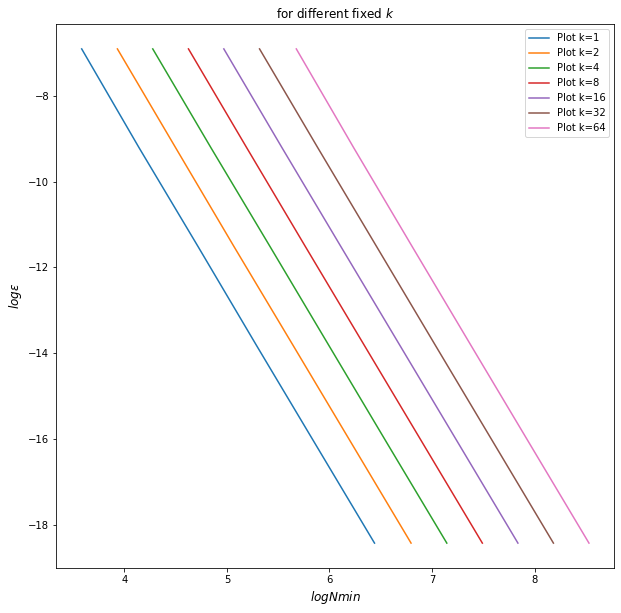

In [9]:
#Reset parameters
n=3
N=0
p=0

Nmin=np.empty(shape=(6))
e=np.array([10**(-3),10**(-4),10**(-5),10**(-6),10**(-7),10**(-8)])

fig, ax = plt.subplots(1,1,figsize=(10, 10))

#NOTE !! We use log diagram here to better show the data.
while p<=6:
    k=2**(p)
    i=0
    while n <= 8:
            epsilon=10**(-n)
            while error(k,N)>=epsilon:
                N=N+1
            Nmin[i]=N
            n=n+1
            i=i+1
    N=0
    ax.set_ylabel(r"$log\epsilon$", fontsize=12)
    ax.set_xlabel(r"$logNmin$", fontsize=12)
    #ax.set_ylim([10**(-6),10**(-3)])
    #ax.set_ylim([Nmin[0], Nmin[-1]])
    ax.plot(np.log(Nmin), np.log(e),label=f"Plot k={k}")
    ax.legend()
    n=3
    p=p+1 
ax.set_title(r"for different fixed $k$")
plt.show()

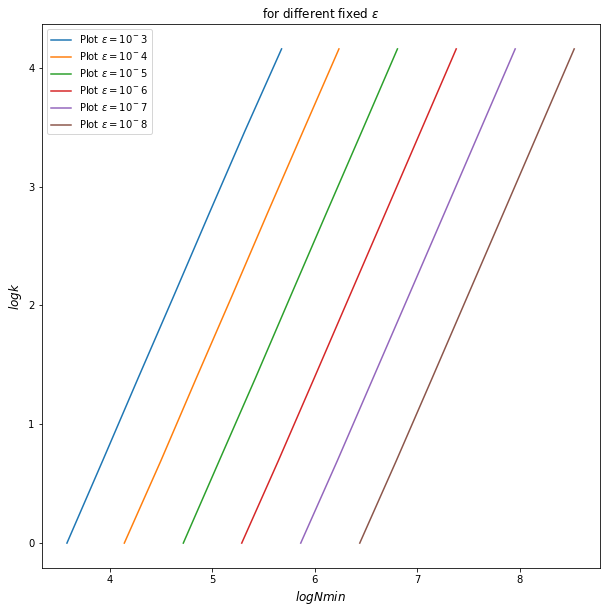

In [10]:
#Reset parameters
n=3 #stands for parameter of epsilon
N=0 #as a cumulative counting number for Nmin
p=0 #stands for parameter of k

Nmin=np.empty(shape=(7)) #define a empty array to store Nmin for distinct parameters
e=np.array([10**(-3),10**(-4),10**(-5),10**(-6),10**(-7),10**(-8)]) #define error in an array
parameterk=np.array([2**(0),2**(1),2**(2),2**(3),2**(4),2**(5),2**(6)]) #define distinct k in a array


fig, ax = plt.subplots(1,1,figsize=(10,10))

#NOTE !! We use log diagram here to better show the data.

while n <= 8:
    i=0
    p=0
    epsilon=10**(-n)
    while p<=6:
        k=2**(p)
        while error(k,N)>=epsilon:
            N=N+1
        Nmin[i]=N
        N=0
        i=i+1
        p=p+1
    ax.set_ylabel(r"$logk$", fontsize=12)
    ax.set_xlabel(r"$logNmin$", fontsize=12)
    ax.plot(np.log(Nmin), np.log(parameterk),label=rf"Plot $\epsilon=10^{-n}$")
    ax.legend()
    n=n+1
ax.set_title(r"for different fixed $\epsilon$")
plt.show()

**3.4** Discuss, with reference to your plot from 3.3, your results. Your answer should be no more than $250$ words.

**[2 marks]**

📝 ***Discussion for question 3.4**
We can clearly observe that, under log justification, the plots are nearly straight lines, showing that the rate of change in the diagram (under log justification) (for both cases fixed k and fixed $\epsilon$) are very similar.



---
## Question 4: Numerical Derivatives [7 marks]

Derivatives can be approximated by finite differences in several ways, for instance

\begin{align*}
        \frac{df}{dx} & \approx \frac{f(x+h) - f(x)}{h} \\
        \frac{df}{dx} & \approx \frac{f(x) - f(x-h)}{h}  \\
        \frac{df}{dx} & \approx \frac{f(x+h) - f(x-h)}{2h} \ . 
\end{align*}

Assuming $f$ to be differentiable, in the limit $h \to 0$, all three expressions are equivalent and exact, but for finite $h$ there are differences. Further discrepancies also arise when using finite precision arithmetic.

**4.1**
Estimate numerically the derivative of $f(x) = \cos(x)$ at $x = 1$ using the three expressions given above and different step sizes $h$. Use at least 50 logarithmically spaced values $h \in [10^{-16}, 10^{-1}]$.

**[2 marks]**

In [11]:
#define F(x)=cos(x)
def F(x):
    return np.cos(x) 
#define the exact derivative F'(x)=-sin(x)
def dF(x):
    return -np.sin(x)
#define logarithmically spaced values h 
h = np.logspace(-16, -1, num=100)

#Let x=1
x=1
#define three ways of approximation  
F_derivative_forward = (F(x + h) - F(x)) / h
F_derivative_backward = (F(x)-F(x-h))/h
F_derivative_centred = (F(x+h)-F(x-h))/(2*h)
#output each of the three ways of approximation of distinct h as array
print (f"forward:{F_derivative_forward}")
print (f"backward:{F_derivative_backward}")
print (f"centred:{F_derivative_centred}")

forward:[ 0.         -1.56648079 -1.10512123 -0.77964118 -0.82503216 -0.97007313
 -0.95811439 -0.77249229 -0.81746706 -0.81700138 -0.84761517 -0.83716605
 -0.86059454 -0.84522359 -0.84824143 -0.83541462 -0.84434352 -0.84337105
 -0.84046352 -0.84243081 -0.84177834 -0.84221186 -0.84100204 -0.84125004
 -0.84175396 -0.84136491 -0.84146003 -0.84146095 -0.84146867 -0.84149353
 -0.84145946 -0.84148573 -0.84146405 -0.84147134 -0.84146649 -0.84147246
 -0.84147063 -0.84146955 -0.84147248 -0.8414708  -0.84147199 -0.8414713
 -0.84147105 -0.84147098 -0.841471   -0.84147112 -0.84147103 -0.84147104
 -0.84147096 -0.841471   -0.84147095 -0.84147099 -0.841471   -0.84147099
 -0.84147099 -0.84147099 -0.84147099 -0.841471   -0.841471   -0.84147101
 -0.84147102 -0.84147103 -0.84147105 -0.84147108 -0.84147112 -0.84147118
 -0.84147125 -0.84147137 -0.84147153 -0.84147175 -0.84147208 -0.84147253
 -0.84147318 -0.84147409 -0.84147539 -0.84147723 -0.84147983 -0.84148352
 -0.84148876 -0.84149618 -0.84150669 -0.8415

**4.2**
Display the absolute difference between the numerical results and the
exact value of the derivative, against $h$ in a doubly logarithmic plot. 
You should format the plot so that the data presentation is clear and easy to understand.

**[2 marks]**

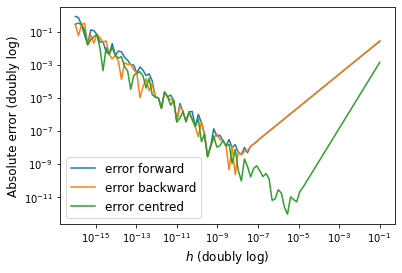

In [12]:
#define absolute error between exact integration and three ways of approximation
Derivative_Error_forward=abs(dF(x)-F_derivative_forward)
Derivative_Error_backward=abs(dF(x)-F_derivative_backward)
Derivative_Error_centred=abs(dF(x)-F_derivative_centred)

#plot error against h in a doubly log diagram
fig, ax = plt.subplots()

plt.loglog(h, Derivative_Error_forward, "-", label="error forward")
plt.loglog(h, Derivative_Error_backward, "-", label="error backward")
plt.loglog(h, Derivative_Error_centred, "-", label="error centred")
ax.set_xlabel(r"$h$ (doubly log)", fontsize=12)
ax.set_ylabel(r"Absolute error (doubly log)", fontsize=12)
ax.legend(fontsize=12)
plt.show()

**4.3**
Describe and interpret your results in no more than 250 words.

*Hint: run the code below.*

**[3 marks]**

In [1]:
h = 1e-14
print(h)
print(1 + h - 1)
print((1 + h - 1)/h)

1e-14
9.992007221626409e-15
0.9992007221626409


📝 ***Discussion for question 4.3***

In the doubly logarithmic plot above, we can obeserve that for the front half of h, three approximations give very similar error, but for the last half of h, error centred keeps decreasing for a while while error forward and backward directly starts increasing.  
